In [2]:
from io import StringIO
import pyaudio
import wave
import matplotlib.pyplot as plt
import numpy as np

In [77]:
sample_format = pyaudio.paInt16  # 16 bits per sample
CHANNELS = 2
RATE = 44100
CHUNK = int(RATE / 4) # 1024 int(RATE / 4)
seconds = 1
filename = "output.wav"
    
p = pyaudio.PyAudio()

player = p.open(format=pyaudio.paInt16, channels=CHANNELS, rate=RATE, output=True, frames_per_buffer=CHUNK)
stream = p.open(format=pyaudio.paInt16, channels=CHANNELS, rate=RATE, input=True,  frames_per_buffer=CHUNK)
frames = []
# for i in range(int(RATE / CHUNK * seconds)):
for i in range(0, int(RATE / CHUNK * seconds)):
    # print(np.fromstring(stream.read(CHUNK),dtype=np.int16))
    frames.append(np.fromstring(stream.read(CHUNK),dtype=np.int16))
    player.write(np.fromstring(stream.read(CHUNK),dtype=np.int16))

    # data = stream.read(CHUNK)
    # print(data)
    # frames.append(data)
stream.stop_stream()
stream.close()
p.terminate()

# save
wf = wave.open(filename, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
/tmp/ipykernel_26293/2761892647.py:16: Deprecat

In [78]:
frames

[array([48, 48, 50, ..., 84, 88, 88], dtype=int16),
 array([49, 49, 40, ..., 42, 48, 48], dtype=int16),
 array([-20, -20, -13, ..., -49, -64, -64], dtype=int16),
 array([498, 498, 164, ..., -12,  -3,  -3], dtype=int16)]

In [79]:
player

In [80]:
data = np.concatenate(frames)

Text(0, 0.5, 'Ampl')

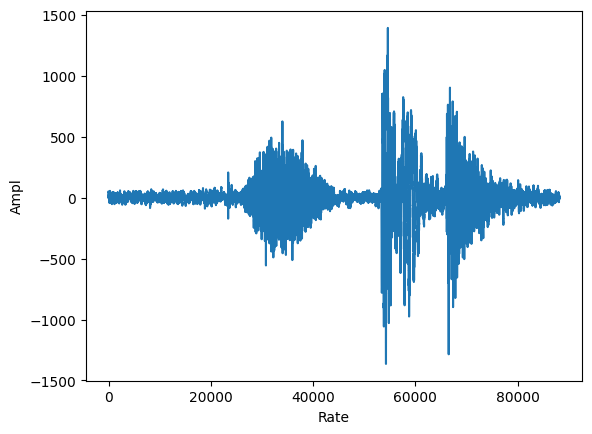

In [81]:
plt.plot(data)
plt.xlabel('Rate')
plt.ylabel('Ampl')

In [82]:
def get_median(lst):
    sorted_lst = sorted(lst)
    mid = len(lst) // 2
    median = sorted_lst[mid]
    return median, np.where(sorted_lst == median)

# median, inx_median = get_median(data)

In [75]:
median = np.median(data)
median

0.0

In [76]:
len(data)//2

44100